In [100]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df =pd.read_csv(r'D:\python for data sinceand ml\data scince project\fake_news_dataseat\Data\news.csv')

In [102]:
print(df.head(10))

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Ka

In [103]:
print(df['text'].head())

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object


In [105]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [106]:
labels=df.label
labels.count()

6335

In [107]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [108]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [109]:
df.loc[1].label

'FAKE'

In [110]:
doc = nlp(df.loc[1].text) 

In [111]:
for ent in doc.ents:
  print(ent.text,'|',ent.label)

Google | 383
two | 397
Paul Ryan | 380
Paul Ryan | 380
Today | 391
Paul Ryan | 380
the Trump Train | 383
a few weeks ago | 391
Trump | 383
Trump | 383
Ryan | 380
the United States | 384
the Republican Party | 383
a chilly afternoon | 392
Wisconsin | 384
@SpeakerRyan | 380
Republicans | 381
ABC News Politics (@ABCPolitics | 383
November 5, 2016 | 391
The Democratic Party | 383
Ryan | 380
zero | 397
Trump | 380
Ryan | 380
2020 | 391
DNC | 383
Election Day | 391
Ryan | 380
Trump | 383
Paul Ryan | 380
Ryan | 380
months | 391
House | 383
Trump | 380
Trump | 383
2016 | 391
2016 | 391
Republicans | 381


In [112]:
from spacy import displacy

displacy.render(doc,style='ent')

In [113]:

df['label'] = df['label'].apply(lambda x:1 if x == 'FAKE' else 0)



In [114]:
df.head()

#?  1 = fake
#   0 = real

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [115]:
from sklearn.model_selection import train_test_split

x = x = df['title'] + " " + df['text']  
y = df.label

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [116]:
x_train.shape

(4434,)

In [117]:
from sklearn .feature_extraction .text import CountVectorizer

v = CountVectorizer()
x_train_cv = v.fit_transform(x_train)

In [118]:
v.get_feature_names_out()[0:200]

array(['00', '000', '0000', '000000031', '000035', '0002', '000billion',
       '000ft', '000km', '000x', '001', '0011', '002', '003', '004',
       '004s', '005s', '006', '00684', '006s', '007', '007s', '008',
       '008s', '009', '0099', '00am', '00pm', '01', '010', '011', '013',
       '013c2812c9', '015', '016', '018', '02', '024', '025', '027',
       '02714', '028', '02870', '02welcome', '03', '030', '031', '032',
       '033', '034', '035', '037', '03747', '039', '03eb', '04', '042',
       '047', '049', '04pm', '05', '050', '0509245d29', '052', '056',
       '058', '06', '062', '063', '0640', '066', '068', '06pm', '07',
       '0700', '071', '075', '076', '079', '07dryempjx', '08', '080',
       '081', '082', '084', '085', '089', '09', '091', '098263', '09am',
       '09pm', '0_65b67362bd', '0_jgdktlmn', '0_kvyhphja', '0a_merrill',
       '0b6njlny5j', '0d', '0dpbdk6rjd', '0fjjvowyhg8qtskiz',
       '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i',
       '0hq3vb2giv', '0

In [119]:
from sklearn .naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train_cv,y_train)

MultinomialNB()

In [120]:
x_test_cv = v.transform(x_test)

from sklearn.metrics import classification_report

y_pred = model.predict(x_test_cv)

In [121]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1024
           1       0.87      0.92      0.89       877

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



In [142]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(y_pred,y_test,)
matrix

array([[900,  62],
       [ 70, 869]], dtype=int64)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

In [ ]:
print(type(clf))


<class 'sklearn.pipeline.Pipeline'>


In [ ]:
clf.fit(x_train,y_train)

c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [144]:

y_pred2 = clf.predict(x_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       970
           1       0.93      0.93      0.93       931

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



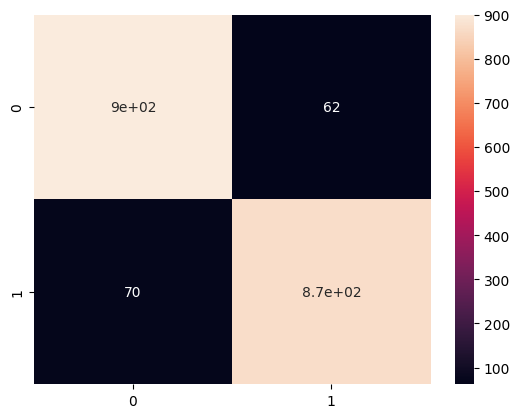

In [146]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(y_pred2,y_test,)
sns.heatmap(matrix, annot=True)
plt.show()
